<a href="https://colab.research.google.com/github/tanayduggad0299/Geolyis/blob/main/Geolocational_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation
!pip install geopandas
import geopandas as gpd
import matplotlib.cm as cm
import folium
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image 
from IPython.core.display import HTML 
# tranforming json file into a pandas dataframe library
from pandas.io.json import json_normalize
print("All packages imported!")

     |████████████████████████████████| 1.0MB 7.8MB/s 
     |████████████████████████████████| 6.6MB 13.8MB/s 
     |████████████████████████████████| 15.4MB 192kB/s 
All packages imported!


**Importing Dataset from Kaggle**

In [ ]:
!pip install kaggle

In [ ]:
from google.colab import drive 
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR']='/content/gdrive/MyDrive/Kaggle_Datsets'

In [ ]:
%cd /content/gdrive/MyDrive/Kaggle_Datsets

/content/gdrive/MyDrive/Kaggle_Datsets


In [ ]:
!ls


food-choices  kaggle.json


In [ ]:
!kaggle datasets download -d borapajo/food-choices

 95% 5.00M/5.25M [00:00<00:00, 36.6MB/s]
100% 5.25M/5.25M [00:00<00:00, 33.7MB/s]


In [ ]:
!mkdir food-choices
!mv food-choices.zip food-choices

mkdir: cannot create directory ‘food-choices’: File exists


In [ ]:
%cd food-choices/

/content/gdrive/MyDrive/Kaggle_Datsets/food-choices


In [ ]:
!unzip food-choices.zip

Archive:  food-choices.zip
replace codebook_food.docx? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
df=pd.read_csv('/content/gdrive/MyDrive/Kaggle_Datsets/food-choices/food_coded.csv')

In [ ]:
dfclean=df[['cook','eating_out','employment','ethnic_food','exercise','fruit_day','income','on_off_campus','pay_meal_out','sports','veggies_day']]
dfclean.dropna(axis=0,inplace=True)
dfclean.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,cook,eating_out,employment,ethnic_food,exercise,fruit_day,income,on_off_campus,pay_meal_out,sports,veggies_day
0,2.0,3,3.0,1,1.0,5,5.0,1.0,2,1.0,5
1,3.0,2,2.0,4,1.0,4,4.0,1.0,4,1.0,4
2,1.0,2,3.0,5,2.0,5,6.0,2.0,3,2.0,5
3,2.0,2,3.0,5,3.0,4,6.0,1.0,2,2.0,3
4,1.0,2,2.0,4,1.0,4,6.0,1.0,4,1.0,4


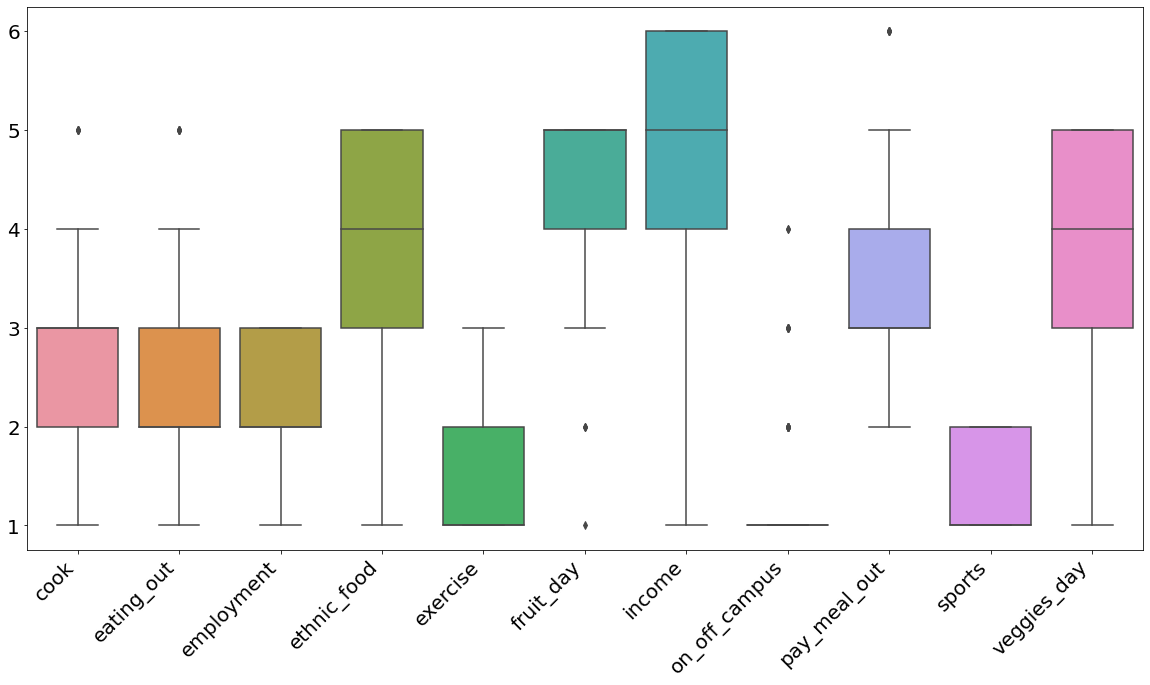

In [ ]:
plt.figure(figsize=(20,10))
sns.boxplot()
ax=sns.boxplot(data=dfclean)
ax.tick_params(labelsize=20)
plt.xticks(rotation=45, ha='right')
plt.show()

In [ ]:
x = dfclean.iloc[:, [0,1,2,3,4,5,6,7,8,9,10]].values

In [ ]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)




[3 4 2 1 2 1 4 0 2 4 0 0 2 2 3 4 0 3 3 1 0 4 0 1 0 1 2 2 4 1 0 4 2 1 1 3 0
 4 2 4 0 4 2 2 3 2 3 2 2 1 3 2 4 1 2 0 1 4 2 4 3 4 2 1 1 0 0 1 1 2 0 0 0 4
 0 1 3 4 0 1 0 2 4 4 4 4 0 1 3 1 2 1 1 0 4 4 4 4 4 3]


In [ ]:
kmeans5.cluster_centers_

array([[3.57142857, 1.80952381, 2.61904762, 3.28571429, 1.28571429,
        4.57142857, 5.66666667, 1.        , 3.76190476, 1.0952381 ,
        4.04761905],
       [2.42857143, 2.23809524, 2.38095238, 3.14285714, 2.04761905,
        3.23809524, 4.71428571, 1.33333333, 3.61904762, 1.61904762,
        2.57142857],
       [2.28571429, 3.0952381 , 2.57142857, 4.80952381, 1.38095238,
        4.85714286, 5.38095238, 1.52380952, 3.85714286, 1.19047619,
        4.66666667],
       [3.        , 4.16666667, 2.5       , 2.16666667, 1.41666667,
        3.66666667, 4.66666667, 1.33333333, 2.75      , 1.16666667,
        3.58333333],
       [2.64      , 2.08      , 2.24      , 4.2       , 1.76      ,
        4.6       , 3.16      , 1.56      , 3.        , 1.56      ,
        4.72      ]])

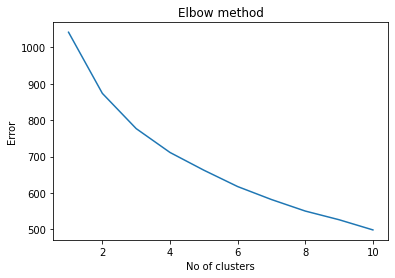

In [ ]:
Error =[]
for i in range(1,11):
    kmeans = KMeans(n_clusters = i).fit(x)
    kmeans.fit(x)
    Error.append(kmeans.inertia_)
import matplotlib.pyplot as plt
plt.plot(range(1,11), Error)
plt.title('Elbow method')
plt.xlabel('No of clusters')
plt.ylabel('Error')
plt.show()

In [ ]:
kmeans3 = KMeans(n_clusters=3)
y_kmeans3 = kmeans3.fit_predict(x)
print(y_kmeans3)

[1 0 2 2 2 0 0 1 2 0 2 2 2 2 1 0 2 1 1 1 2 0 1 1 2 1 2 2 0 0 1 0 2 2 2 1 2
 0 2 0 2 0 2 2 0 2 1 2 2 0 1 2 0 1 2 2 1 0 2 2 1 0 2 1 1 2 2 1 1 2 2 2 2 0
 2 1 1 0 2 1 2 2 0 2 0 0 2 1 1 1 2 1 0 1 0 0 0 0 0 1]


In [ ]:
kmeans3.cluster_centers_

array([[2.67857143, 2.21428571, 2.35714286, 4.10714286, 1.75      ,
        4.32142857, 2.96428571, 1.57142857, 3.14285714, 1.53571429,
        4.35714286],
       [2.72413793, 3.        , 2.34482759, 2.34482759, 1.62068966,
        3.5862069 , 5.06896552, 1.31034483, 3.44827586, 1.4137931 ,
        2.96551724],
       [2.8372093 , 2.39534884, 2.58139535, 4.27906977, 1.48837209,
        4.65116279, 5.48837209, 1.25581395, 3.62790698, 1.18604651,
        4.41860465]])

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


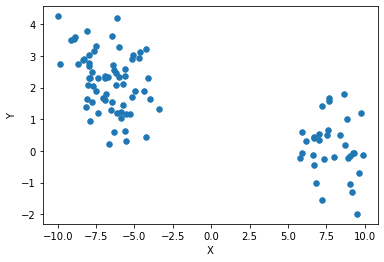

<Figure size 432x288 with 0 Axes>

In [ ]:
from matplotlib import style
from sklearn.datasets.samples_generator import make_blobs
x, y = make_blobs(n_samples = 100, centers = 3, 
                cluster_std = 1, n_features = 11)
                  
plt.scatter(x[:, 0], x[:, 1], s = 30, cmap='nipy_spectral')
  
# label the axes
plt.xlabel('X')
plt.ylabel('Y')
  
plt.show()
plt.clf()

In [ ]:
search_query='Apartment'
radius=18000
latitude=19.19370
longitude=72.85873

In [ ]:
CLIENT_ID='P4FQEVGMNFR2XPXJ1GEGFC14BV34BX1Q1PKNNP1P4HNOMLP1'
CLIENT_SECRET='Y4PPGRX5KHBK5JA3GXLDCL5GH5YXESODMBODU4ANRN4YPUMN'
VERSION='20210605'
LIMIT=200



In [ ]:
url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)

In [ ]:
results = requests.get(url).json()

In [ ]:
venues = results['response']['venues']

# tranform venues into a dataframe
dataframe = json_normalize(venues)
dataframe.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  after removing the cwd from sys.path.


,id,name,categories,referralId,hasPerk,location.address,location.crossStreet,location.lat,location.lng,location.labeledLatLngs,location.distance,location.postalCode,location.cc,location.city,location.state,location.country,location.formattedAddress,location.neighborhood,venuePage.id
0,556ab992498e608f2567a36c,Silver Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1625025993,False,Silver Apartment,"Akurli Road 1, Kandivali East",19.203014,72.853172,"[{'label': 'display', 'lat': 19.20301437377929...",1190,400101,IN,Mumbai,Mahārāshtra,India,"[Silver Apartment (Akurli Road 1, Kandivali Ea...",NaN,NaN
1,4d401a1f90f9224b4619031e,Malad apartment co op hsg soc,"[{'id': '4f2a210c4b9023bd5841ed28', 'name': 'H...",v-1625025993,False,NaN,NaN,19.186453,72.847148,"[{'label': 'display', 'lat': 19.186453, 'lng':...",1460,400064,IN,NaN,Mahārāshtra,India,"[400064, Mahārāshtra, India]",NaN,NaN
2,54a3f212498e87a65d889daa,Kedarnath Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1625025993,False,"Adarshdughdalaya, Mistree Lane",Malad West,19.194807,72.841660,"[{'label': 'display', 'lat': 19.19480705261230...",1798,400064,IN,Mumbai,Mahārāshtra,India,"[Adarshdughdalaya, Mistree Lane (Malad West), ...",NaN,NaN
3,4f70d68fe4b032eb66127246,Le Midas Apartment,"[{'id': '4d954b06a243a5684965b473', 'name': 'R...",v-1625025993,False,601 Le Midas Apartment,"Ram Chandra Lane, Malad(West)",19.194006,72.844417,"[{'label': 'display', 'lat': 19.194006, 'lng':...",1505,400064,IN,Mumbai,Mahārāshtra,India,"[601 Le Midas Apartment (Ram Chandra Lane, Mal...",NaN,NaN
4,50f81945e4b0626fb740bd89,Gods Grace Apartment,"[{'id': '5032891291d4c4b30a586d68', 'name': 'A...",v-1625025993,False,"Adarsha Dairy Rd, Kandivli West, Mumbai, Mahar...",NaN,19.194887,72.841614,"[{'label': 'display', 'lat': 19.19488716125488...",1804,400064,IN,Mumbai,Maharshtra,India,"[Adarsha Dairy Rd, Kandivli West, Mumbai, Maha...",NaN,NaN


In [ ]:
filtered_columns=['name','categories']+[col for col in dataframe.columns if col.startswith('location')]+['id']
filtered_dataframe=dataframe.loc[:,filtered_columns]
filtered_dataframe.head()
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

# filter the category for each row
filtered_dataframe['categories'] = filtered_dataframe.apply(get_category_type, axis=1)

# clean column names by keeping only last term
filtered_dataframe.columns = [column.split('.')[-1] for column in filtered_dataframe.columns]
# dataframe_filtered.drop([4,17,18,21,24,30,43],axis=0,inplace=True) #remove some unwanted locations like hotels
filtered_dataframe.drop(['cc','country','state','city','neighborhood'],axis=1,inplace=True) #no need for those columns as we know we're in Bangalore,IN
filtered_dataframe.head()

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,formattedAddress,id
0,Silver Apartment,Residential Building (Apartment / Condo),Silver Apartment,"Akurli Road 1, Kandivali East",19.203014,72.853172,"[{'label': 'display', 'lat': 19.20301437377929...",1190,400101,"[Silver Apartment (Akurli Road 1, Kandivali Ea...",556ab992498e608f2567a36c
1,Malad apartment co op hsg soc,Housing Development,NaN,NaN,19.186453,72.847148,"[{'label': 'display', 'lat': 19.186453, 'lng':...",1460,400064,"[400064, Mahārāshtra, India]",4d401a1f90f9224b4619031e
2,Kedarnath Apartment,Residential Building (Apartment / Condo),"Adarshdughdalaya, Mistree Lane",Malad West,19.194807,72.841660,"[{'label': 'display', 'lat': 19.19480705261230...",1798,400064,"[Adarshdughdalaya, Mistree Lane (Malad West), ...",54a3f212498e87a65d889daa
3,Le Midas Apartment,Residential Building (Apartment / Condo),601 Le Midas Apartment,"Ram Chandra Lane, Malad(West)",19.194006,72.844417,"[{'label': 'display', 'lat': 19.194006, 'lng':...",1505,400064,"[601 Le Midas Apartment (Ram Chandra Lane, Mal...",4f70d68fe4b032eb66127246
4,Gods Grace Apartment,Assisted Living,"Adarsha Dairy Rd, Kandivli West, Mumbai, Mahar...",NaN,19.194887,72.841614,"[{'label': 'display', 'lat': 19.19488716125488...",1804,400064,"[Adarsha Dairy Rd, Kandivli West, Mumbai, Maha...",50f81945e4b0626fb740bd89


In [ ]:
!pip install folium

In [ ]:
df_evaluate=filtered_dataframe[['lat','lng']]
df_evaluate.head()

,lat,lng
0,19.203014,72.853172
1,19.186453,72.847148
2,19.194807,72.841660
3,19.194006,72.844417
4,19.194887,72.841614


In [ ]:
RestList=[]
latitudes = list(filtered_dataframe.lat)
longitudes = list(filtered_dataframe.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 15000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Restaurant' #Search for any locations which are regularly needed by Outsiders.
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    RestList.append(dataframe_filtered2['categories'].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
df_evaluate['Restaurants']=RestList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
FruitList=[]
latitudes = list(filtered_dataframe.lat)
longitudes = list(filtered_dataframe.lng)
for lat, lng in zip(latitudes, longitudes):    
    radius = 15000 #Set the radius to 5 kilometres for convenience
    latitude=lat#Query for the apartment location in question
    longitude=lng
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
    search_query = 'Fruit' #Search for any food related locations
    results = requests.get(url).json()
    # assign relevant part of JSON to venues
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe2 = json_normalize(venues)
    filtered_columns = ['name', 'categories'] + [col for col in dataframe2.columns if col.startswith('location.')] + ['id']
    dataframe_filtered2 = dataframe2.loc[:, filtered_columns]
    # filter the category for each row
    dataframe_filtered2['categories'] = dataframe_filtered2.apply(get_category_type, axis=1)
    # clean column names by keeping only last term
    dataframe_filtered2.columns = [column.split('.')[-1] for column in dataframe_filtered2.columns]
    FruitList.append(dataframe_filtered2['categories'].count())

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:14: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  


In [ ]:
df_evaluate['Groceries']=FruitList

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_evaluate)
df_evaluate['Cluster']=kmeans.labels_
df_evaluate['Cluster']=df_evaluate['Cluster'].apply(str)
df_evaluate.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,lat,lng,Restaurants,Groceries,Cluster
0,19.203014,72.853172,49,47,0
1,19.186453,72.847148,47,49,0
2,19.194807,72.841660,48,49,0
3,19.194006,72.844417,48,49,0
4,19.194887,72.841614,48,49,0


In [ ]:
#define coordinates of the college
map_bang=folium.Map(location=[19.19370,72.85873],zoom_start=12)
# instantiate a feature group for the incidents in the dataframe
locations = folium.map.FeatureGroup()
# set color scheme for the clusters
def color_producer(cluster):
    if cluster=='0':
        return 'green'
    elif cluster=='1':
        return 'orange'
    else:
        return 'red'
latitudes = list(df_evaluate.lat)
longitudes = list(df_evaluate.lng)
labels = list(df_evaluate.Cluster)
names=list(filtered_dataframe.name)
address=list(filtered_dataframe.address)
for lat, lng, label,names,address in zip(latitudes, longitudes, labels,names,address):
    folium.CircleMarker(
            [lat,lng],
            fill=True,
            fill_opacity=1,
            popup=folium.Popup(names, max_width = 300),
            radius=5,
            color=color_producer(label)
        ).add_to(map_bang)

# add locations to map
map_bang.add_child(locations)

map_bang

,name,categories,address,crossStreet,lat,lng,labeledLatLngs,distance,postalCode,formattedAddress,id
0,Silver Apartment,Residential Building (Apartment / Condo),Silver Apartment,"Akurli Road 1, Kandivali East",19.203014,72.853172,"[{'label': 'display', 'lat': 19.20301437377929...",1190,400101,"[Silver Apartment (Akurli Road 1, Kandivali Ea...",556ab992498e608f2567a36c
1,Malad apartment co op hsg soc,Housing Development,NaN,NaN,19.186453,72.847148,"[{'label': 'display', 'lat': 19.186453, 'lng':...",1460,400064,"[400064, Mahārāshtra, India]",4d401a1f90f9224b4619031e
2,Kedarnath Apartment,Residential Building (Apartment / Condo),"Adarshdughdalaya, Mistree Lane",Malad West,19.194807,72.841660,"[{'label': 'display', 'lat': 19.19480705261230...",1798,400064,"[Adarshdughdalaya, Mistree Lane (Malad West), ...",54a3f212498e87a65d889daa
3,Le Midas Apartment,Residential Building (Apartment / Condo),601 Le Midas Apartment,"Ram Chandra Lane, Malad(West)",19.194006,72.844417,"[{'label': 'display', 'lat': 19.194006, 'lng':...",1505,400064,"[601 Le Midas Apartment (Ram Chandra Lane, Mal...",4f70d68fe4b032eb66127246
4,Gods Grace Apartment,Assisted Living,"Adarsha Dairy Rd, Kandivli West, Mumbai, Mahar...",NaN,19.194887,72.841614,"[{'label': 'display', 'lat': 19.19488716125488...",1804,400064,"[Adarsha Dairy Rd, Kandivli West, Mumbai, Maha...",50f81945e4b0626fb740bd89
5,Zenith Apartment,Residential Building (Apartment / Condo),Dominic Colony Road Number 1,"Orlem, Malad West",19.195640,72.839736,"[{'label': 'display', 'lat': 19.19563998581775...",2008,400064,"[Dominic Colony Road Number 1 (Orlem, Malad We...",58621787e386e329a447fa38
6,ApartmentADDA,Business Service,"504, Tanishka Building, Near Big Bazaar, Akurl...",NaN,19.201431,72.860985,"[{'label': 'display', 'lat': 19.20143050922711...",892,400101,"[504, Tanishka Building, Near Big Bazaar, Akur...",552e5a61498eec260fe16b03
7,Jay Apartment,Residential Building (Apartment / Condo),NaN,NaN,19.206053,72.838558,"[{'label': 'display', 'lat': 19.20605272849316...",2527,NaN,[India],5449ef43498ecb0abc78b7a4
8,Concorde Service Apartment,Bed & Breakfast,"D 1103 Raheja Residency, Near Raheja Heights, ...",film city road,19.187257,72.835446,"[{'label': 'display', 'lat': 19.1872565, 'lng'...",2550,400097,"[D 1103 Raheja Residency, Near Raheja Heights,...",575f0ee7498e165ac84dbcb5
9,Concorde Service Apartment,Bed & Breakfast,link road,NaN,19.184416,72.835742,"[{'label': 'display', 'lat': 19.18441596735917...",2628,400064,"[link road, Malad 400064, Mahārāshtra, India]",556f337a498e103ac14375ae
